# Calibration

This notebook exemplifies a calibration process for the infection probability parameter. The method generalizes to other type of inputs, as well as calibration parameters.

## CAUTION

This notebook might be out of date.

## Input Data

For this example, the input is social isolation data, acquired from https://www.inloco.com.br/covid-19, open and close time series for the services being modelled, and compartimental data, deduced from hospitalization data for the city of Maragogi-AL,Brazil. The format of this data given in numbers for each day of the year.


In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from comorbuss.settings import *
from comorbuss.services import *
import comorbuss.tools as tools
from comorbuss import community
import numpy as np
import comorbuss.lab as lab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

susceptible = [32368.98, 32368.98, 32368.98, 32368.98, 32368.98, 32368.96, 32368.94, 32368.94, 32368.92, 32368.9 , 32368.9 , 32368.9 , 32368.9 , 32368.9 , 32368.9 , 32368.86, 32368.86, 32368.86, 32368.86, 32368.86, 32368.86, 32368.86, 32368.86, 32368.84, 32368.84, 32368.82, 32368.82, 32368.82, 32368.8 , 32368.78, 32368.76, 32368.76, 32368.76, 32368.72, 32368.72, 32368.7 , 32368.7 , 32368.68, 32368.62, 32368.58, 32368.52, 32368.44, 32368.36, 32368.28, 32368.06, 32367.94, 32367.5 , 32367.04, 32366.48, 32365.82, 32365.04, 32364.18, 32362.9 , 32361.54, 32360.3 , 32359.24, 32358.92, 32358.84, 32358.78, 32358.72, 32358.7 , 32358.66, 32358.58, 32358.52, 32358.46, 32358.32, 32358.26, 32358.2 , 32358.12, 32357.98, 32357.94, 32357.8 , 32357.74, 32357.66, 32357.56, 32357.24, 32356.98, 32356.72, 32356.36, 32355.98, 32355.46, 32354.76, 32353.64, 32352.82, 32351.72, 32350.16, 32348.52, 32346.4 , 32343.56, 32340.6 , 32337.1 , 32333.22, 32329.48, 32325.16, 32321.16, 32317.26, 32312.76, 32307.84, 32301.52, 32294.94, 32287.18, 32277.68, 32267.72, 32254.72, 32241.52, 32225.48, 32205.06, 32183.54, 32157.74, 32127.78, 32095.4 , 32057.1 , 32011.7 , 31962.52, 31910.66, 31855.18, 31795.54, 31733.3 , 31673.28, 31611.98, 31552.24, 31493.04, 31432.54, 31375.98, 31317.34, 31254.9 , 31187.32, 31113.38, 31037.92, 30962.68, 30888.22, 30821.88, 30761.8 , 30707.82, 30659.6 , 30614.58, 30574.14, 30538.84, 30506.22, 30476.06, 30446.72, 30417.16, 30383.9 , 30347.64, 30307.02, 30266.1 , 30224.08, 30182.6 , 30143.1 , 30106.56, 30071.68, 30038.12, 30005.42, 29973.86, 29945.06, 29918.18, 29891.34, 29865.58, 29837.9 , 29811.96, 29787.68, 29763.58, 29739.6 , 29716.5 , 29692.78, 29671.5 , 29651.06, 29633.1 , 29615.3 , 29598.52, 29581.78, 29565.06, 29546.3 , 29528.06, 29511.72, 29496.8 , 29480.6 , 29466.1 , 29453.02, 29439.14, 29426.38, 29412.24, 29397.9 , 29383.34, 29369.8 , 29356.58, 29344.02, 29333.04, 29323.48, 29313.82, 29302.98, 29289.88, 29274.52, 29257.34, 29239.36, 29222.78, 29206.36, 29192.36, 29179.24, 29166.88, 29155.76, 29146.  , 29134.78, 29123.26, 29112.06, 29102.64, 29093.8 , 29084.72, 29076.02, 29067.54, 29059.6 , 29052.9 , 29047.18, 29042.74, 29039.42, 29037.04, 29035.44, 29034.04, 29032.4 , 29031.  , 29029.3 , 29027.72, 29026.56, 29025.64, 29024.6 , 29023.48, 29022.42, 29021.58, 29020.56, 29019.58, 29018.96, 29018.4 , 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38, 29018.38]
exposed = [2.0000e-02, 2.0000e-02, 2.0000e-02, 2.0000e-02, 2.0000e-02, 4.0000e-02, 6.0000e-02, 6.0000e-02, 8.0000e-02, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.4000e-01, 1.4000e-01, 1.4000e-01, 1.4000e-01, 1.4000e-01, 1.4000e-01, 1.4000e-01, 1.4000e-01, 1.6000e-01, 1.6000e-01, 1.8000e-01, 1.8000e-01, 1.8000e-01, 2.0000e-01, 2.2000e-01, 2.4000e-01, 2.4000e-01, 2.4000e-01, 2.8000e-01, 2.8000e-01, 3.0000e-01, 3.0000e-01, 3.2000e-01, 3.8000e-01, 4.2000e-01, 4.8000e-01, 5.6000e-01, 6.4000e-01, 7.2000e-01, 9.4000e-01, 1.0600e+00, 1.5000e+00, 1.9400e+00, 2.5000e+00, 3.1400e+00, 3.8800e+00, 4.5800e+00, 5.5200e+00, 6.2000e+00, 6.0800e+00, 4.6600e+00, 2.1400e+00, 7.4000e-01, 6.0000e-01, 6.6000e-01, 6.8000e-01, 7.2000e-01, 8.0000e-01, 8.6000e-01, 9.2000e-01, 1.0600e+00, 1.1200e+00, 1.1800e+00, 1.2600e+00, 1.4000e+00, 1.4400e+00, 1.5800e+00, 1.6400e+00, 1.7200e+00, 1.8200e+00, 2.1400e+00, 2.4000e+00, 2.6600e+00, 3.0200e+00, 3.4000e+00, 3.9200e+00, 4.6200e+00, 5.7400e+00, 6.5600e+00, 7.6600e+00, 9.2000e+00, 1.0740e+01, 1.2780e+01, 1.5140e+01, 1.7040e+01, 1.8500e+01, 1.9820e+01, 2.1400e+01, 2.3300e+01, 2.4060e+01, 2.3920e+01, 2.4420e+01, 2.7200e+01, 3.2380e+01, 3.7140e+01, 4.2020e+01, 4.8760e+01, 5.4480e+01, 6.3340e+01, 7.2060e+01, 8.2900e+01, 9.8340e+01, 1.1150e+02, 1.2486e+02, 1.4074e+02, 1.5890e+02, 1.8064e+02, 2.0686e+02, 2.2686e+02, 2.4260e+02, 2.5652e+02, 2.6766e+02, 2.7906e+02, 2.8052e+02, 2.7910e+02, 2.7408e+02, 2.7350e+02, 2.7366e+02, 2.6770e+02, 2.6694e+02, 2.7838e+02, 3.0252e+02, 3.2592e+02, 3.3926e+02, 3.3650e+02, 3.2336e+02, 2.9952e+02, 2.7448e+02, 2.4738e+02, 2.2496e+02, 2.0428e+02, 1.8508e+02, 1.6884e+02, 1.5394e+02, 1.4336e+02, 1.3926e+02, 1.4042e+02, 1.4968e+02, 1.6452e+02, 1.7882e+02, 1.8922e+02, 1.9178e+02, 1.8732e+02, 1.7910e+02, 1.7146e+02, 1.6204e+02, 1.5574e+02, 1.4928e+02, 1.4522e+02, 1.3686e+02, 1.2478e+02, 1.1946e+02, 1.1832e+02, 1.2290e+02, 1.2144e+02, 1.1440e+02, 1.0866e+02, 1.0772e+02, 1.0760e+02, 1.0738e+02, 1.0050e+02, 9.2020e+01, 8.4480e+01, 8.1080e+01, 7.7620e+01, 7.4520e+01, 7.5860e+01, 7.8960e+01, 8.0800e+01, 7.7320e+01, 7.2580e+01, 6.9040e+01, 6.6260e+01, 6.3980e+01, 6.1900e+01, 5.9820e+01, 6.1840e+01, 6.4600e+01, 6.6580e+01, 6.4940e+01, 6.2560e+01, 5.6420e+01, 5.1120e+01, 4.7440e+01, 4.5900e+01, 4.9660e+01, 5.7460e+01, 6.6080e+01, 7.5620e+01, 7.9740e+01, 7.8900e+01, 7.4080e+01, 6.5980e+01, 5.8860e+01, 5.2960e+01, 4.8580e+01, 4.6140e+01, 4.7540e+01, 5.0140e+01, 4.9700e+01, 4.5600e+01, 4.2020e+01, 4.0060e+01, 3.8580e+01, 3.7320e+01, 3.4500e+01, 3.0140e+01, 2.4720e+01, 1.8980e+01, 1.4160e+01, 9.8600e+00, 7.4800e+00, 6.4200e+00, 6.7000e+00, 6.9600e+00, 6.9200e+00, 6.4800e+00, 5.9600e+00, 5.6200e+00, 5.2200e+00, 4.4000e+00, 4.0800e+00, 4.2600e+00, 4.5600e+00, 4.3800e+00, 2.9800e+00, 1.6400e+00, 1.4000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]
infectious = [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-02, 2.0000e-02, 4.0000e-02, 8.0000e-02, 2.4000e-01, 5.8000e-01, 1.2600e+00, 2.6200e+00, 5.0600e+00, 7.8600e+00, 9.2600e+00, 9.2000e+00, 8.9000e+00, 8.4000e+00, 7.6400e+00, 6.2200e+00, 4.7600e+00, 3.3200e+00, 2.2400e+00, 1.6600e+00, 1.1400e+00, 5.4000e-01, 3.4000e-01, 2.6000e-01, 1.8000e-01, 1.6000e-01, 1.2000e-01, 8.0000e-02, 6.0000e-02, 4.0000e-02, 2.0000e-02, 2.0000e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-02, 1.2000e-01, 2.0000e-01, 6.8000e-01, 1.7400e+00, 3.7800e+00, 6.3400e+00, 8.5000e+00, 1.0780e+01, 1.3760e+01, 1.7420e+01, 2.0720e+01, 2.1520e+01, 2.0960e+01, 2.0700e+01, 2.1460e+01, 2.1200e+01, 2.2420e+01, 2.3420e+01, 2.4900e+01, 2.7640e+01, 3.0400e+01, 3.6380e+01, 4.6220e+01, 5.7140e+01, 6.7640e+01, 8.0400e+01, 9.4620e+01, 1.1828e+02, 1.4708e+02, 1.7964e+02, 2.1860e+02, 2.5728e+02, 3.0136e+02, 3.4534e+02, 3.8662e+02, 4.1830e+02, 4.4544e+02, 4.6864e+02, 4.8290e+02, 4.8268e+02, 4.7166e+02, 4.6596e+02, 4.7112e+02, 4.8754e+02, 5.1644e+02, 5.4994e+02, 5.7976e+02, 6.0612e+02, 6.2230e+02, 6.2740e+02, 6.1846e+02, 5.9848e+02, 5.6954e+02, 5.3256e+02, 4.8852e+02, 4.4234e+02, 3.9668e+02, 3.5304e+02, 3.2036e+02, 2.9634e+02, 2.8742e+02, 2.9186e+02, 3.0116e+02, 3.1198e+02, 3.2536e+02, 3.3476e+02, 3.4144e+02, 3.4200e+02, 3.4228e+02, 3.3914e+02, 3.3040e+02, 3.1538e+02, 2.9666e+02, 2.8304e+02, 2.7516e+02, 2.6574e+02, 2.5398e+02, 2.4232e+02, 2.3388e+02, 2.3082e+02, 2.2982e+02, 2.2716e+02, 2.1994e+02, 2.1264e+02, 2.0452e+02, 1.9428e+02, 1.8240e+02, 1.7356e+02, 1.6884e+02, 1.6488e+02, 1.6072e+02, 1.5736e+02, 1.5360e+02, 1.5066e+02, 1.4666e+02, 1.3966e+02, 1.3192e+02, 1.2662e+02, 1.2338e+02, 1.2228e+02, 1.2492e+02, 1.2570e+02, 1.2382e+02, 1.2180e+02, 1.1598e+02, 1.0666e+02, 9.7560e+01, 9.0580e+01, 8.8740e+01, 9.2080e+01, 1.0068e+02, 1.1146e+02, 1.2274e+02, 1.3168e+02, 1.3780e+02, 1.3878e+02, 1.3442e+02, 1.2724e+02, 1.2170e+02, 1.1664e+02, 1.1196e+02, 1.0638e+02, 1.0140e+02, 9.7880e+01, 9.6220e+01, 9.5140e+01, 9.3860e+01, 9.2260e+01, 8.8500e+01, 8.4460e+01, 7.7300e+01, 7.0120e+01, 6.0080e+01, 5.0420e+01, 4.1960e+01, 3.4560e+01, 2.7740e+01, 2.2500e+01, 1.8380e+01, 1.6720e+01, 1.5200e+01, 1.3660e+01, 1.2220e+01, 1.1440e+01, 1.1820e+01, 1.2400e+01, 1.2440e+01, 1.1360e+01, 9.8200e+00, 8.5200e+00, 7.4200e+00, 5.9400e+00, 4.3200e+00, 2.9200e+00, 1.9200e+00, 1.4200e+00, 9.0000e-01, 5.2000e-01, 4.2000e-01, 2.8000e-01, 1.8000e-01, 1.0000e-01, 6.0000e-02, 4.0000e-02, 2.0000e-02, 2.0000e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]
recovered = [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e-02, 8.00000e-02, 1.60000e-01, 4.20000e-01, 7.20000e-01, 1.22000e+00, 1.98000e+00, 3.40000e+00, 4.86000e+00, 6.30000e+00, 7.38000e+00, 7.96000e+00, 8.48000e+00, 9.08000e+00, 9.28000e+00, 9.36000e+00, 9.44000e+00, 9.46000e+00, 9.50000e+00, 9.54000e+00, 9.56000e+00, 9.58000e+00, 9.60000e+00, 9.60000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.62000e+00, 9.76000e+00, 1.00200e+01, 1.04000e+01, 1.11000e+01, 1.24400e+01, 1.41400e+01, 1.62200e+01, 1.83400e+01, 2.13600e+01, 2.43800e+01, 2.75200e+01, 3.05200e+01, 3.29800e+01, 3.52000e+01, 3.75800e+01, 4.01800e+01, 4.33400e+01, 4.70600e+01, 5.08600e+01, 5.58200e+01, 6.13400e+01, 6.86600e+01, 7.76600e+01, 8.72000e+01, 9.93600e+01, 1.13840e+02, 1.32580e+02, 1.56060e+02, 1.84160e+02, 2.17360e+02, 2.56680e+02, 3.01820e+02, 3.53040e+02, 4.07500e+02, 4.63740e+02, 5.20700e+02, 5.82280e+02, 6.40980e+02, 6.97660e+02, 7.52960e+02, 8.07680e+02, 8.62140e+02, 9.22740e+02, 9.91320e+02, 1.06284e+03, 1.13930e+03, 1.21702e+03, 1.29450e+03, 1.36908e+03, 1.43874e+03, 1.50380e+03, 1.56280e+03, 1.61734e+03, 1.66572e+03, 1.70722e+03, 1.74564e+03, 1.77900e+03, 1.80992e+03, 1.84038e+03, 1.87286e+03, 1.90792e+03, 1.94480e+03, 1.98690e+03, 2.02780e+03, 2.06972e+03, 2.11154e+03, 2.15256e+03, 2.19176e+03, 2.23102e+03, 2.26770e+03, 2.30258e+03, 2.33496e+03, 2.36618e+03, 2.39610e+03, 2.42426e+03, 2.45268e+03, 2.48022e+03, 2.50818e+03, 2.53380e+03, 2.56134e+03, 2.58658e+03, 2.61112e+03, 2.63474e+03, 2.65864e+03, 2.67928e+03, 2.69840e+03, 2.71730e+03, 2.73614e+03, 2.75526e+03, 2.77458e+03, 2.79246e+03, 2.81088e+03, 2.82758e+03, 2.84364e+03, 2.85914e+03, 2.87426e+03, 2.88748e+03, 2.90038e+03, 2.91500e+03, 2.93084e+03, 2.94546e+03, 2.96116e+03, 2.97524e+03, 2.98788e+03, 2.99920e+03, 3.00816e+03, 3.01748e+03, 3.02686e+03, 3.03808e+03, 3.05226e+03, 3.06836e+03, 3.08554e+03, 3.10412e+03, 3.12122e+03, 3.13784e+03, 3.15300e+03, 3.16626e+03, 3.17868e+03, 3.19082e+03, 3.20324e+03, 3.21502e+03, 3.22692e+03, 3.23764e+03, 3.24878e+03, 3.25842e+03, 3.26982e+03, 3.28062e+03, 3.29082e+03, 3.30024e+03, 3.30874e+03, 3.31524e+03, 3.32080e+03, 3.32440e+03, 3.32730e+03, 3.32950e+03, 3.33166e+03, 3.33360e+03, 3.33524e+03, 3.33656e+03, 3.33804e+03, 3.33926e+03, 3.34080e+03, 3.34210e+03, 3.34320e+03, 3.34468e+03, 3.34630e+03, 3.34770e+03, 3.34870e+03, 3.34920e+03, 3.34972e+03, 3.35010e+03, 3.35020e+03, 3.35034e+03, 3.35044e+03, 3.35052e+03, 3.35056e+03, 3.35058e+03, 3.35060e+03, 3.35060e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03, 3.35062e+03]
isol_pct = [0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.281553398, 0.330456227, 0.229508197, 0.273284314, 0.292475728, 0.231990232, 0.223289316, 0.268004723, 0.311688312, 0.222222222, 0.228235294, 0.250593824, 0.242152466, 0.229922992, 0.295227525, 0.333716916, 0.22298066, 0.27030303, 0.291762014, 0.250591017, 0.2375, 0.283893395, 0.356132075, 0.279151943, 0.321787709, 0.310305776, 0.269689737, 0.265969803, 0.280641466, 0.341637011, 0.267065868, 0.308894231, 0.303135889, 0.279429251, 0.278153153, 0.296505073, 0.357062147, 0.293729373, 0.313681869, 0.280924855, 0.351635514, 0.278177458, 0.340768278, 0.390334572, 0.306431274, 0.322263223, 0.367103695, 0.343483557, 0.364595545, 0.4400978, 0.531288344, 0.5, 0.499417928, 0.497607656, 0.505494505, 0.523227384, 0.485461441, 0.574873096, 0.47001224, 0.477272727, 0.471938776, 0.476303318, 0.473300971, 0.480295567, 0.559431525, 0.474722565, 0.469211823, 0.415757576, 0.414868106, 0.457142857, 0.41595092, 0.522077922, 0.446960667, 0.436585366, 0.445544554, 0.464771323, 0.412311266, 0.458726415, 0.551071879, 0.445114596, 0.479654747, 0.456760049, 0.41097561, 0.46562123, 0.432068543, 0.547762999, 0.451461988, 0.444948922, 0.417607223, 0.442739079, 0.439909297, 0.428571429, 0.48372093, 0.457647059, 0.438006952, 0.48969697, 0.509433962, 0.418949772, 0.456299659, 0.501133787, 0.442521632, 0.507334963, 0.487654321, 0.479902558, 0.478054567, 0.493567251, 0.566582915, 0.487272727, 0.488151659, 0.46191052, 0.487951552, 0.429, 0.462, 0.562, 0.44, 0.436, 0.428, 0.433, 0.412, 0.486, 0.535, 0.422, 0.414, 0.41, 0.40, 0.396, 0.409, 0.493, 0.393, 0.405, 0.408, 0.451, 0.365, 0.428, 0.514, 0.444, 0.401, 0.393, 0.4, 0.352, 0.393, 0.475, 0.392, 0.375, 0.433, 0.391, 0.381, 0.419, 0.487, 0.431]
isol_pct_time_series = np.full(len(susceptible), 0.487951552)
isol_pct_time_series[:np.minimum(len(susceptible), len(isol_pct))] = isol_pct[:np.minimum(len(susceptible), len(isol_pct))]
data=[susceptible, exposed, infectious, recovered, isol_pct_time_series]

## Objective function

The calibration process maximizes a loss function given by $l(p) = dist_{p}(x) $, where $p$ is the parameter being optimized for, and $x$ some real data that the program is able to approximate. The function $dist$ is a distribution for the approximated value of $x$, which varies according to the seed integer provided. It suffices to calculate values $x_s$ for several seed integers $s$ and fit an approximation to these $x_s$ values. Notice that the function $l(p)$ optimizes when the maximum of the distribution $dist_{p}$ coincides with the real value $x$. 

In the function below, we try to fit each of the compartiments individually or as a set. That is, $x$ is in this case given by one of the following options: $S$, $E$, $I$, $R$, $SE$ (and other two compartiment combinations), $SEIR$ (and other three compartiment combinations) or $SEIR$. Because part of the same compartiments must be provided as input as well, we set $x=S(t_f)$, for example, where $t_f$ is a final time, and provide as input $S(t_i)$, $E(t_i)$, $I(t_i)$, $R(t_i)$, where $t_i$ is an initial time. That is, we provide the compartiments for an initial time, along with the remaining parameters (including $p$), and evaluate the distribution $dist_p$ of the compartiments at a final time. The two values $t_f$ and $t_i$ cannot be too far, in order not to ignore what happens in the intermediate times, but they also cannot be too close, as to disregard the times out of the range $[t_i, t_f]$. For this reason, we modify $l(p)$ to be a sum of $dist_{p, t_i, t_f}$, where $t_i$ and $t_f$ are chosen as to cover the whole time domain where one is interested to look at.

The function bellow returns the evaluation of $l(p)$ for each of the compartiment combinations, where `day_to_start` is identified with the lower limit for $t_i$, `day_to_end` is identified with the upper limit for $t_f$, `days_window` is the fixed value for $t_f-t_i$, and `days_step` is the time step chosen to increment both $t_i$ and $t_f$. 

In [2]:
def eval_loss_func(data, fixed_parameters, iteration_parameters, day_to_start=0, \
                   day_to_end=365, days_window=30, days_step=1, \
                   nproc=8, seeds=np.arange(1, 101), experiment_name='Loss_Func', \
                   attempt_loading_from_disk=False, append_data=False):
    recording_data = ['susceptible', 'exposed', 'infectious', 'recovered', 'deceased', 'encounters', 'inf_placement', "inf_source"]
    fixed_parameters['social_isolation'] = True
    fixed_parameters['number_of_days'] = days_window
    total_pop_size = data[0][0]+data[1][0]+data[2][0]+data[3][0]
    exp = lab.Experiment(experiment_name, fixed_parameters, iteration_parameters, recording_data, seeds)
    loss_values = {}
    norm_values = {}
    exp_param_range = len(exp.iterable)
    enc_values = []
    has_not_plotted_hist = True
    for first_day in range(day_to_start, day_to_end-days_window+1, days_step):
        last_day = first_day+days_window
        sus_ref = np.array(data[0][first_day:last_day])
        sus_ref_norm = np.sqrt(np.sum(sus_ref*sus_ref))
        exp_ref = np.array(data[1][first_day:last_day])
        exp_ref_norm = np.sqrt(np.sum(exp_ref*exp_ref))
        inf_ref = np.array(data[2][first_day:last_day])
        inf_ref_norm = np.sqrt(np.sum(inf_ref*exp_ref))
        rec_ref = np.array(data[3][first_day:last_day])
        rec_ref_norm = np.sqrt(np.sum(rec_ref*rec_ref))
        fixed_parameters['inf0_perc'] = [data[0][first_day], data[1][first_day], data[2][first_day], data[3][first_day]]
        fixed_parameters['isol_pct_time_series'] = data[4][first_day:last_day]
        exp_name = f"{experiment_name}_first_day-{first_day}"
        try:
            if not attempt_loading_from_disk:
                raise Exception("Proceed with calculation instead of loading")
            exp = lab.Experiment(exp_name, fixed_parameters, iteration_parameters, recording_data, seeds)
            exp.load_simulation()
        except Exception as e:
            print(e, exp_name)
            fixed_parameters['service_close_day_series_config'] = [SERVICE_CLOSE_DAYS_FILE, first_day, last_day+1]
            sim = lab.Simulation(exp_name, fixed_parameters, iteration_parameters, recording_data, seeds, recording_data_srvc=TO_STORE_SRVC, nproc=nproc, wipe_on_run=(not attempt_loading_from_disk), append_data=append_data)
            sim.run()
            exp = lab.Experiment(exp_name, fixed_parameters, iteration_parameters, recording_data, seeds)
            exp.load_simulation()
        for paramsIndex, params in enumerate(exp.iterable):
            sim_id = exp.get_exp_id(params)
            Nparticles = exp.realizations[sim_id]['triaged_parameters']['Nparticles']
            sus_data = np.zeros(len(exp.seeds))
            exp_data = np.zeros(len(exp.seeds))
            inf_data = np.zeros(len(exp.seeds))
            rec_data = np.zeros(len(exp.seeds))
            inf_data_max_norm = []
            exp_data_max_norm = []
            sus_data_max_norm = []
            rec_data_max_norm = []
            sus_data_hist = []
            exp_data_hist = []
            inf_data_hist = []
            rec_data_hist = []
            for seedIndex, seed in enumerate(exp.seeds):
                seed_id = 'seed_{}'.format(seed)
                try:
                    datas = exp.realizations[sim_id]['realizations'][seed_id]['susceptible']
                    sus_data[seedIndex] = datas[-1]
                    sus_data_hist = sus_data_hist + [datas[-1]]
                    datas *= (total_pop_size/Nparticles)
                    sus_data_max_norm = sus_data_max_norm+[datas[::24]*sus_ref/(np.sqrt(np.sum(datas[::24]*datas[::24]))*sus_ref_norm)]
                    datas = exp.realizations[sim_id]['realizations'][seed_id]['exposed']
                    exp_data[seedIndex] = datas[-1]
                    exp_data_hist = exp_data_hist + [datas[-1]]
                    datas *= (total_pop_size/Nparticles)
                    exp_data_max_norm = exp_data_max_norm+[datas[::24]*exp_ref/(np.sqrt(np.sum(datas[::24]*datas[::24]))*exp_ref_norm)]
                    datas = exp.realizations[sim_id]['realizations'][seed_id]['infectious']
                    inf_data[seedIndex] = datas[-1]
                    inf_data_hist = inf_data_hist + [datas[-1]]
                    datas *= (total_pop_size/Nparticles)
                    inf_data_max_norm = inf_data_max_norm+[datas[::24]*inf_ref/(np.sqrt(np.sum(datas[::24]*datas[::24]))*inf_ref_norm)]
                    datas = exp.realizations[sim_id]['realizations'][seed_id]['recovered']
                    rec_data[seedIndex] = datas[-1]
                    rec_data_hist = rec_data_hist + [datas[-1]]
                    datas *= (total_pop_size/Nparticles)
                    rec_data_max_norm = rec_data_max_norm+[datas[::24]*rec_ref/(np.sqrt(np.sum(datas[::24]*datas[::24]))*rec_ref_norm)]
                    datas = exp.realizations[sim_id]['realizations'][seed_id]['deceased']
                    rec_data[seedIndex] += datas[-1]
                    enc = exp.realizations[sim_id]['realizations'][seed_id]['encounters']
                    enc_values = enc_values + [24*np.sum(enc)/(len(enc)*fixed_parameters['number_of_particles'])]
                except Exception as e:
                    print(e, exp_name)
            inf_data_max_norm = np.mean(np.array(inf_data_max_norm))
            exp_data_max_norm = np.mean(np.array(exp_data_max_norm))
            sus_data_max_norm = np.mean(np.array(sus_data_max_norm))
            rec_data_max_norm = np.mean(np.array(rec_data_max_norm))
            for use_sus_data in [True, False]:
                for use_exp_data in [True, False]:
                    for use_inf_data in [True, False]:
                        for use_rec_data in [True, False]:
                            if use_sus_data or use_exp_data or use_inf_data or use_rec_data:
                                key = ""
                                values_list = []
                                real_value = []
                                norm_value = 0
                                if use_sus_data:
                                    key = key + "S"
                                    values_list = values_list + [sus_data]
                                    real_value = real_value + [data[0][last_day]*Nparticles/total_pop_size]
                                    norm_value = np.maximum(norm_value, sus_data_max_norm)
                                if use_exp_data:
                                    key = key + "E"
                                    values_list = values_list + [exp_data]
                                    real_value = real_value + [data[1][last_day]*Nparticles/total_pop_size]
                                    norm_value = np.maximum(norm_value, exp_data_max_norm)
                                if use_inf_data:
                                    key = key + "I"
                                    values_list = values_list + [inf_data]
                                    real_value = real_value + [data[2][last_day]*Nparticles/total_pop_size]
                                    norm_value = np.maximum(norm_value, inf_data_max_norm)
                                if use_rec_data:
                                    key = key + "R"
                                    values_list = values_list + [rec_data]
                                    real_value = real_value + [data[3][last_day]*Nparticles/total_pop_size]
                                    norm_value = np.maximum(norm_value, rec_data_max_norm)
                                values = np.vstack(values_list)
                                if key not in norm_values:
                                    norm_values[key] = [ [] for _ in range(exp_param_range) ]
                                norm_values[key][paramsIndex] = norm_values[key][paramsIndex]+[norm_value]
                                try:
                                    if key not in loss_values:
                                        loss_values[key] = [ [] for _ in range(exp_param_range) ] #np.ones(exp_param_range)
                                    g_kde = stats.gaussian_kde(values)
                                    if loss_values[key][paramsIndex] == -1:
                                        loss_values[key][paramsIndex] = []
                                    loss_values[key][paramsIndex] = loss_values[key][paramsIndex] + [g_kde.evaluate(np.vstack(real_value))[0]]
                                    if (key == "S") and has_not_plotted_hist:
                                        if key == "S":
                                            import seaborn as sns
                                            sns.set_style("white")
                                            plt.figure(figsize=(10,7), dpi= 80)
                                            sns.distplot(sus_data_hist, color="dodgerblue", label="Compact")
                                            plt.title("dist_p for S. Red star is x")
                                            plt.plot(data[0][last_day]*Nparticles/total_pop_size, 0, "r*", linewidth=3)
                                            plt.savefig(f"sus_data_hist_{first_day}_{params}.pdf")
                                            plt.show()
                                            has_not_plotted_hist = False
                                        if key == "E":
                                            import seaborn as sns
                                            sns.set_style("white")
                                            plt.figure(figsize=(10,7), dpi= 80)
                                            sns.distplot(exp_data_hist, color="dodgerblue", label="Compact")
                                            plt.title("dist_p for E. Red star is x")
                                            plt.plot(data[1][last_day]*Nparticles/total_pop_size, 0, "r*", linewidth=3)
                                            plt.savefig(f"exp_data_hist_{first_day}_{params}.pdf")
                                            plt.show()
                                            has_not_plotted_hist = False
                                        if key == "I":
                                            import seaborn as sns
                                            sns.set_style("white")
                                            plt.figure(figsize=(10,7), dpi= 80)
                                            sns.distplot(inf_data_hist, color="dodgerblue", label="Compact")
                                            plt.title("dist_p for I. Red star is x")
                                            plt.plot(data[2][last_day]*Nparticles/total_pop_size, 0, "r*", linewidth=3)
                                            plt.savefig(f"inf_data_hist_{first_day}_{params}.pdf")
                                            plt.show()
                                            has_not_plotted_hist = False
                                        if key == "R":
                                            import seaborn as sns
                                            sns.set_style("white")
                                            plt.figure(figsize=(10,7), dpi= 80)
                                            sns.distplot(rec_data_hist, color="dodgerblue", label="Compact")
                                            plt.title("dist_p for R. Red star is x")
                                            plt.plot(data[3][last_day]*Nparticles/total_pop_size, 0, "r*", linewidth=3)
                                            plt.savefig(f"rec_data_hist_{first_day}_{params}.pdf")
                                            plt.show()
                                            has_not_plotted_hist = False
                                except Exception as e:
                                    if loss_values[key][paramsIndex] == []:
                                        loss_values[key][paramsIndex] = -1
                                    print(e, key)
    return loss_values,  norm_values, enc_values

## Fixed parameters

The fixed parameters include every parameter that is not to be optimized. These contain, in this case, disease parameters, demographic parameters, and visitation parameters.

In [3]:
fixed_parameters = {
    'number_of_particles': 2000,
    'population_graph': nx.read_gexf(os.path.join(DATA_DIREC, "rede_domiciliar_maragogi.gexf")),
    'store_time_series': False,
    'use_networks': True,
    'show_warning_messages': False,
    'infection_probability_correction': True,
    'services_close': True,
    'use_day_series': True,
    'isol_stay_prob': 0.6,
    'outdoor_inf_prob_weight': 1.0/(12.0*20.0),
    "use_virulence": False,
    #"vir_map_infection_probability": "const",
    'inf_duration': 8.0,
        #{
        #"distribution": "lognormal",
        #"kwargs": "mean=2.0491292307716185,sigma=0.24622067706923975",
        #"acceptable_range": [1/25, 14]} ,
    'inf_severe_duration': 14.0,
        #{
        #"distribution": "lognormal",
        #"arguments": "mean=2.6245752231222124,sigma=0.17018875693209617",
        #"acceptable_range": [1/25, 50]},
    'inf_incubation': 4.6,
        #{
        #"distribution": "lognormal",
        #"kwargs": "mean=1.1577502124482724,sigma=0.8582611386364607",
        #"acceptable_range": [1/25, 16]},
    'inf_activation_time': 1.8,
        #{
        #"distribution": "lognormal",
        #"kwargs": "mean=0.4291212817151636,sigma=0.5633211929032236",
        #"acceptable_range": [1/25, 5.5]},
    'inf_prob_sympt': 0.11,
    'inf_severe_sympt_prob': 0.3,
    'inf_severe_death_prob': 0.1,
    'inf0_perc_symp': [(1. - 0.11), (0.11 * (1 - 0.3)), (0.11 * 0.3)],
    'inf_susceptibility': [0.34, 0.34, 0.34, 1., 1., 1., 1., 1., 1., 1., 1.,
                                       1., 1., 1.47, 1.47, 1.47, 1.47, 1.47, 1.47, 1.47, 1.47],
    'diagnostics_positive_prob': 0.4,
    'city_name': 'Maragogi',
    'city_area': 7.654,
    'population_ages':  [
          2791,
          3072,
          3117,
          3523,
          3470,
          2843,
          2442,
          2535,
          2374,
          1966,
          1708,
          1418,
          1180,
          865,
          630,
          433,
          177,
          32,
          8,
          7,
          7,
     ],
    'persons_per_home': 3.89,
    'number_of_markets': 39, # Supermarkets and Smallmarkets are not considered in this parameter
    'number_of_hospitals': 12,
    'number_of_schools': 33,
    'number_of_restaurants': 97,
    'number_of_street_markets': 1,
    'number_of_generic_services': 406,
    'home_mean_contacts': 2,
    'environment_multiplicative_constant': 12, # number necessary because net has been calibrated for contacts of 5 minutes
    'services': [
        (HOSPITALS, {
        "number": 12,
        "days": [1, 1, 1, 1, 1, 1, 1],
        "workers": [{
                "number": 30,
                "shifts": [[0, 6], [6, 18], [18, 0]],
            }],
        "visitation_period": 1366.0,
        "net_par": {
            "disease_worker_prob": 1.0,
            "worker_mean_contacts": 2.0,
            "disease_worker_mean_contacts": 2.0,
            "disease_worker_to_worker_mean_contacts": 2.0,
            "visitor_mean_contacts": 2.0,
            "visitor_to_worker_mean_contacts": 2.0,
            "guest_to_disease_worker_mean_contacts": 1.0,
        }}),
        (STREET_MARKETS, {
        "days": [1, 1, 1, 1, 1, 1, 1],
        "visitation_period": 7.365,
        "number": 1,
        "net_par": {
        "seller_mean_contacts": 6.0,
        "visitor_mean_contacts": 16.0,
        "visitor_to_seller_mean_contacts": 6.0,
        }}),
        (MARKETS, {
        "number": 39,
        "days": [1, 1, 1, 1, 1, 1, 1],
        "visitation_period": 79.31538461538462,
        "hours": [8, 18],
        "workers": [{
            "number": 3.5,
            "shifts": [[8, 18]],
        }],
        "net_type": NET_MARKETS,
        "net_par": {
            'mean_contacts': 3.0,
            'cashier_prob': 0.2857142857142857
            }
        }),
        (MARKETS, {
        "name": "Supermarkets",
        "number": 5,
        "days": [1, 1, 1, 1, 1, 1, 1],
        "visitation_period": 43.567604767,
        "hours": [8, 18],
        "workers": [{
            "number": 14.4,
            "shifts": [[8, 12], [12, 18]],
        }],
        "net_type": NET_MARKETS,
        "net_par": {
            'mean_contacts': 3.0,
            'cashier_prob': 0.222222222
            }
        }),
        # (SCHOOLS, {
        # "name": "Nursery",
        # "number": 11,
        # "hours": [7, 13],
        # "workers": [{
        #     "name": "Students",
        #     "population_fraction": 0.448532013,
        #     "shifts": [[7, 13]],
        #     "age_groups": [0],
        #     "family_visitation_period": 90,
        #     "family_age_groups": np.arange(4, 12),
        # }, {
        #     "name": "Teachers",
        #     "number": 58,
        #     "shifts": [[7, 13]],
        # }],
        # "rooms": [{
        #     "Students": 10,
        #     "Teachers": 1,
        # }, {
        #     "Students": 10,
        # }],
        # "net_par": {
        #     "break_classrooms": 5,
        #     "break_period": 1.,
        #     "break_mean_contacts": 2.,
        #     }
        # }),
        # (SCHOOLS, {
        # "number": 33,
        # "hours": [7, 19],
        # "workers": [{
        #     "name": "Students",
        #     "population_fraction": 0.82212483,
        #     "shifts": [[7, 13], [13, 19]],
        #     "age_groups": [1, 2],
        #     "family_visitation_period": 90,
        #     "family_age_groups": np.arange(4, 12),
        # }, {
        #     "name": "Teachers",
        #     "number": 198,
        #     "shifts": [[7, 13], [13, 19]],
        # }],
        # "rooms": [{
        #     "Students": 24,
        #     "Teachers": 1,
        # }, {
        #     "Students": 24,
        # }],
        # "net_par": {
        #     "break_classrooms": 5,
        #     "break_period": 1.,
        #     "break_mean_contacts": 2.,
        #     }
        # }),
        # (SCHOOLS, {
        # "name": "High-School",
        # "number": 3,
        # "hours": [7, 19],
        # "workers": [{
        #     "name": "Students",
        #     "population_fraction": 0.457932319,
        #     "shifts": [[7, 13], [13, 19]],
        #     "age_groups": [3],
        #     "family_visitation_period": 90,
        #     "family_age_groups": np.arange(4, 12),
        # }, {
        #     "name": "Teachers",
        #     "number": 90,
        #     "shifts": [[7, 13], [13, 19]],
        # }],
        # "rooms": [{
        #     "Students": 24,
        #     "Teachers": 1,
        # }, {
        #     "Students": 24,
        # }],
        # "net_par": {
        #     "break_classrooms": 5,
        #     "break_period": 1.,
        #     "break_mean_contacts": 2.,
        #     }
        # }),
        # (RESTAURANTS, {
        # "number": 97,
        # "visitation_period": 30,
        # "workers": [{
        #     "number": 9.5,
        #     "shifts": [[12, 22]],
        # }]}),
        # (GENERIC,{
        # "number": 406,
        # "days": [0, 1, 1, 1, 1, 1, 0],
        # "workers": [{
        #     "population_fraction": 0.3375,
        # }]})
    ]
}

## Iteration parameters

The iteration parameters contain, in this case, all values of $p$ to be checked for. In this simple optimization process, we only search for the optimum $p$ on a set of acceptable values. The function `eval_loss_func` will return the evaluation of $l(p)$ for each combination of parameters given in the dictionary of lists below. 

PS: For optimization on more than one parameter, it suffices to include the list of possible values in the dictionary below

In [4]:
prob = [0.015, 0.016, 0.017, 0.018, 0.019, 0.02]
iteration_parameters = {
    'inf_probability': prob
}

## Simulation parameters

Below we define simulation parameters, adjustable to user's needs

In [5]:
day_to_start=130
day_to_end=185
days_window=20
days_step=10
nproc=8
seeds=np.arange(1, 9)
experiment_name='Infection_probability_optimization'
attempt_loading_from_disk = True
append_data=False

## Evaluation of the loss function

Below we make the call to the evaluation of the loss function. This call may take a while, depending on the number of parameters to be search for the optimum, the number of seeds and the parameters `days_window` and `days_step`.

4-th leading minor of the array is not positive definite SEIR


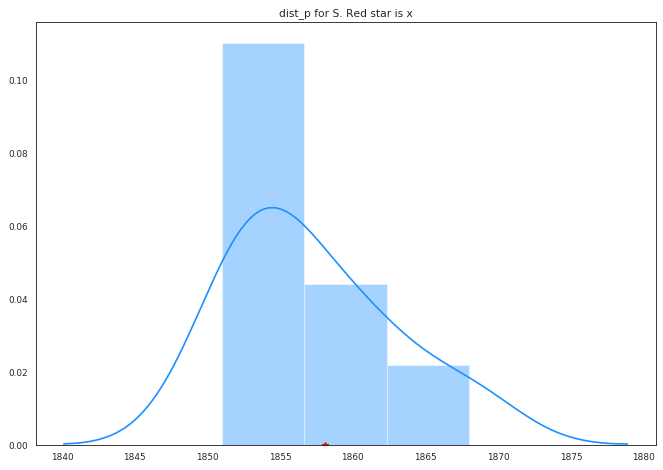

/home/iledoino/anaconda3/lib/python3.7/site-packages/scipy/stats/kde.py:581: RuntimeWarning: invalid value encountered in sqrt
  self._norm_factor = sqrt(linalg.det(2*pi*self.covariance))


1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
4-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
3-th leading minor of the array is not positive definite SEIR
3-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
1-th leading minor of the array is not positive definite SEIR
3-th leading minor of the array is not positive definite SEIR


In [6]:
[loss_values_dict, norm_values_dict, enc_values] = eval_loss_func(\
                           data=data, fixed_parameters=fixed_parameters, \
                           iteration_parameters=iteration_parameters, \
                           day_to_start=day_to_start, day_to_end=day_to_end, \
                           days_window=days_window, days_step=days_step, \
                           nproc=nproc, seeds=seeds, experiment_name=experiment_name, \
                           attempt_loading_from_disk=attempt_loading_from_disk, \
                           append_data=append_data)

## Post processing

Below we plot $l(p)$ for each $x$. Notice that the optima vary according to the compartiment we choose to look at. 

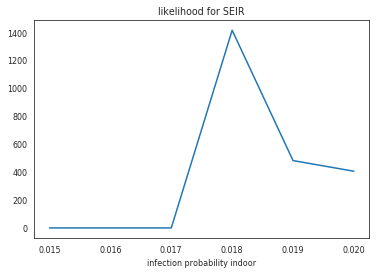

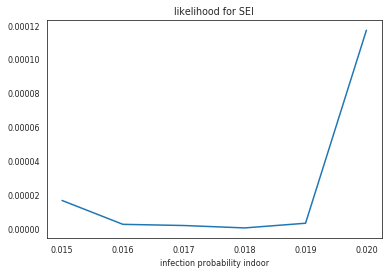

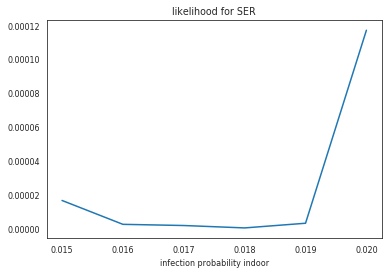

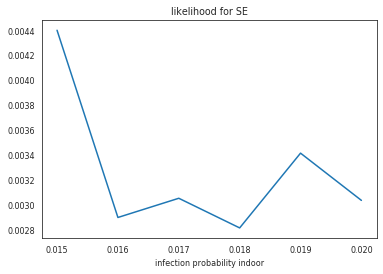

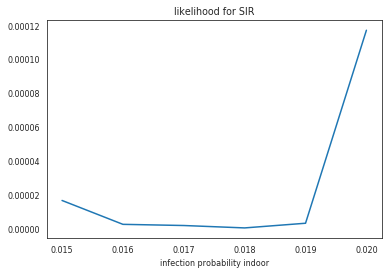

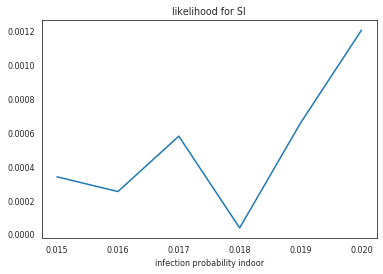

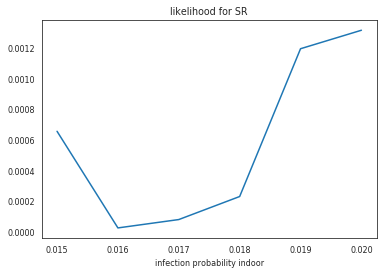

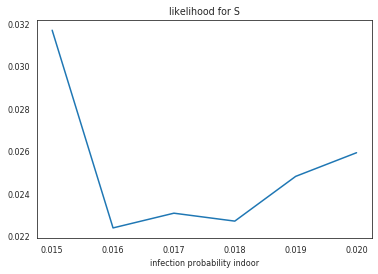

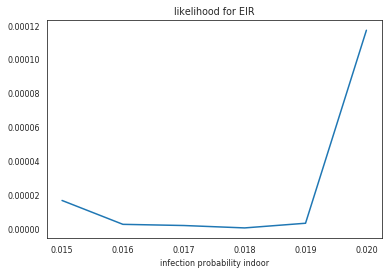

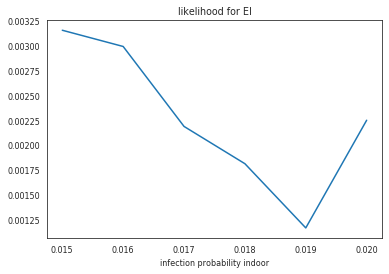

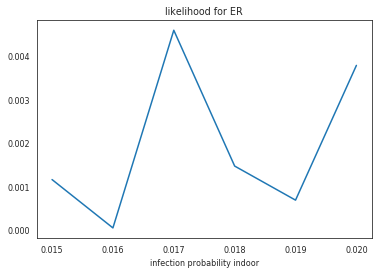

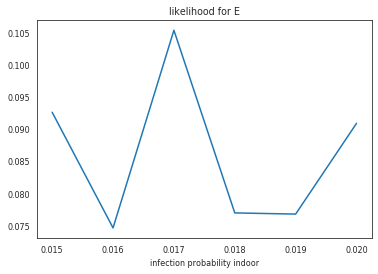

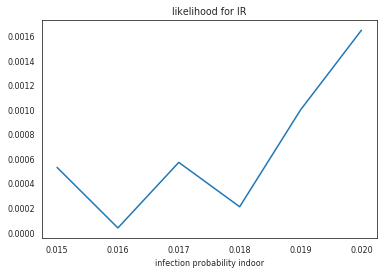

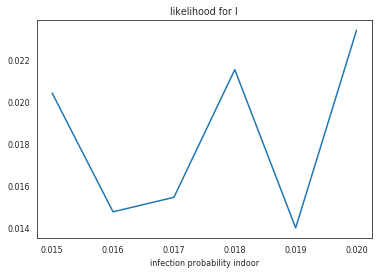

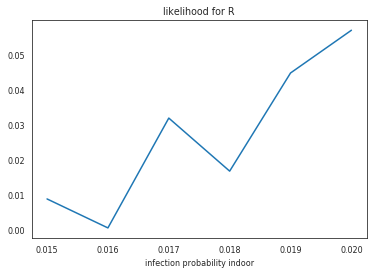

In [7]:
for key, loss_values in loss_values_dict.items():
    norm_values = norm_values_dict[key]
    for i, l in enumerate(loss_values):
        if l==-1:
            loss_values[i] = [-1, -1]
        if (type(l) == list) and len(l) < 2:
            loss_values[i] = [l[0], l[0]]
        loss_values[i] = np.min(np.array(loss_values[i]))
        norm_values[i] = np.min(np.array(norm_values[i]))
    loss_values = np.array(loss_values)
    norm_values = np.array(norm_values)
    loss_values[np.isnan(loss_values)] = -1
    fig = plt.figure()
    plt.plot(prob, loss_values)
    plt.xlabel("infection probability indoor")
    plt.title("likelihood for "+key)
    ind_max = np.where(loss_values == np.max(loss_values))[0][0]
    R0 = prob[ind_max]*np.mean(enc_values)*(fixed_parameters['inf_duration']*(1-fixed_parameters['inf_prob_sympt']*fixed_parameters['inf_severe_sympt_prob'])+fixed_parameters['inf_severe_duration']*fixed_parameters['inf_prob_sympt']*fixed_parameters['inf_severe_sympt_prob'])
    plt.savefig("{:}_p={}_R0={:}.pdf".format(key,prob[ind_max],R0))
    plt.show()
    # fig = plt.figure()
    # plt.plot(prob, norm_values)
    # plt.xlabel("infection probability indoor")
    # plt.title("likelihood for "+key)
    # ind_max = np.where(norm_values == np.max(norm_values))[0][0]
    # R0 = prob[ind_max]*np.mean(enc_values)*8
    # plt.savefig("{:}_p={}_R0={:}_norm.pdf".format(key,prob[ind_max],R0))
    # plt.show()